# CICIDS - Hybrid Model CNN-GAN

The CICIDS2017 dataset is a comprehensive dataset for network intrusion detection, created by the Canadian Institute for Cybersecurity. It includes a diverse set of attack scenarios and normal traffic, making it suitable for training and evaluating intrusion detection systems.

The dataset includes various types of attacks such as Brute Force, Heartbleed, Botnet, DoS (Denial of Service), DDoS (Distributed Denial of Service), Web attacks, and Infiltration of the network from inside.

I aim to replicate this study: <https://www.jait.us/articles/2024/JAIT-V15N7-886.pdf>

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Step 1. EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [5]:
# Should be 8 files
df_monday = pd.read_csv("./data/original/Monday-WorkingHours.pcap_ISCX.csv")
df_tuesday = pd.read_csv("./data/original/Tuesday-WorkingHours.pcap_ISCX.csv")
df_wednesday = pd.read_csv("./data/original/Wednesday-workingHours.pcap_ISCX.csv")

df_thursdayOne = pd.read_csv("./data/original/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df_thursdayTwo = pd.read_csv("./data/original/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

df_fridayOne = pd.read_csv("./data/original/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df_fridayTwo = pd.read_csv("./data/original/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df_fridayThree = pd.read_csv("./data/original/Friday-WorkingHours-Morning.pcap_ISCX.csv")

# combine the 8 dataframes into 1
df_train = pd.concat([df_monday, df_tuesday, df_wednesday, df_thursdayOne, df_thursdayTwo, df_fridayOne, df_fridayTwo, df_fridayThree], ignore_index=True)


In [6]:
df_train.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df_train.shape

(2830743, 79)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [9]:
df_train.describe()

c:\Users\Harman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Harman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [10]:
df_train.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

## Step 2. Data Cleaning

### A. Missing values

In [11]:
print(df_train.isna().sum().sum())

1358


In [12]:
df_train.dropna(subset=["Flow Bytes/s"], inplace=True)

In [13]:
print(df_train.isna().sum().sum())

0


### Inf. values

In [14]:
df_train = df_train.replace([np.inf, -np.inf], np.nan).dropna()

## Step 3. Data Preparation

### A. Categorical data

In [15]:
categorical_columns = df_train.select_dtypes(include=['object']).columns

for column in categorical_columns:
	print(f"Column '{column}' contains {len(df_train[column].value_counts())} unique values, namely {df_train[column].unique().tolist()}")

Column ' Label' contains 15 unique values, namely ['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'Infiltration', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection', 'DDoS', 'PortScan', 'Bot']


C:\Users\Harman\AppData\Local\Temp\ipykernel_12360\2531058536.py:8: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Harman\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


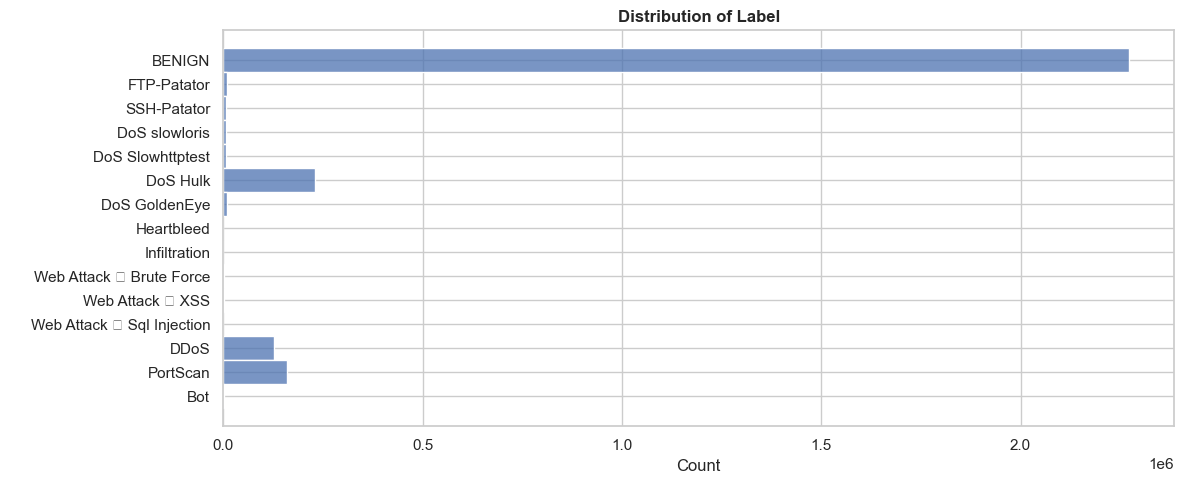

In [16]:
df = df_train

plt.figure(figsize=(12, 5))
sns.histplot(data=df, y=df[" Label"])
plt.ylabel(" ")
plt.title(f"Distribution of Label", fontweight="bold")

plt.tight_layout()
plt.show()

## Step 4. Preparing dataset for modeling

### A. Normalise numeric features

In [17]:
# Get all numerical columns
numerical_columns = df_train.select_dtypes(include="number").columns

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

### B. Map Labels to Multi-class

In [19]:
df_train[" Label"].value_counts()

 Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [20]:
attack_mapping = {
	"BENIGN": 0,
	"DoS Hulk": 1,
	"PortScan": 2,
	"DDoS": 3,
	"DoS GoldenEye": 4,
	"FTP-Patator": 5,
	"SSH-Patator": 6,
	"DoS slowloris": 7,
	"DoS Slowhttptest": 8,
	"Bot": 9,
	"Web Attack � Brute Force": 10,
	"Web Attack � XSS": 11,
	"Infiltration": 12,
	"Web Attack � Sql Injection": 13,
	"Heartbleed": 14,
}

df_train[" Label"] = df_train[" Label"].map(attack_mapping)

In [21]:
df_train[" Label"].value_counts()

 Label
0     2271320
1      230124
2      158804
3      128025
4       10293
5        7935
6        5897
7        5796
8        5499
9        1956
10       1507
11        652
12         36
13         21
14         11
Name: count, dtype: int64

### C. Data Splitting

In [22]:
X = df_train.drop(columns=" Label")
y = df_train[" Label"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### D. Apply SMOTE to balance the training data

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# takes about 3m05s

In [25]:
# Check class distribution after SMOTE
from collections import Counter

print(f"Class distribution before SMOTE: {Counter(y_train)}")
print(f"Class distribution after SMOTE: {Counter(y_train_balanced)}")

Class distribution before SMOTE: Counter({0: 1817112, 1: 184342, 2: 126927, 3: 102239, 4: 8219, 5: 6363, 6: 4769, 7: 4630, 8: 4390, 9: 1515, 10: 1206, 11: 533, 12: 29, 13: 17, 14: 9})
Class distribution after SMOTE: Counter({0: 1817112, 6: 1817112, 1: 1817112, 3: 1817112, 2: 1817112, 7: 1817112, 4: 1817112, 11: 1817112, 9: 1817112, 5: 1817112, 8: 1817112, 10: 1817112, 12: 1817112, 13: 1817112, 14: 1817112})


### E. PyTorch Model Design

#### 1. CNN Feature Extractor

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define CNN Feature Extractor
class CNNFeatureExtractor(nn.Module):
    def __init__(self, input_size, num_filters=32):
        super(CNNFeatureExtractor, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear((input_size // 2) * num_filters, 64)
    
    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        return self.fc(x)

#### 2. Generator-Discriminator

In [29]:
# Define Generator
class Generator(nn.Module):
    def __init__(self, noise_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.model(x)


# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

#### 3. Define Hybrid Model

In [30]:
# Define Hybrid Model
class HybridCNNGAN(nn.Module):
    def __init__(self, input_size, output_size, noise_dim=32):
        super(HybridCNNGAN, self).__init__()
        self.feature_extractor = CNNFeatureExtractor(input_size)
        self.classifier = nn.Linear(64, output_size)
        self.generator = Generator(noise_dim, input_size)
        self.discriminator = Discriminator(input_size)
    
    def forward(self, x):
        features = self.feature_extractor(x)
        return self.classifier(features)

In [31]:
# Initialize model
input_size = X_train_balanced.shape[1]
output_size = len(attack_mapping)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridCNNGAN(input_size, output_size).to(device)

### F. Training the Model

In [ ]:
# Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_dataset = TensorDataset(torch.tensor(X_train_balanced.values, dtype=torch.float32).to(device),
                              torch.tensor(y_train_balanced.values, dtype=torch.long).to(device))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for i, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        progress = (i + 1) / len(train_loader) * 100
        print(f'\rEpoch [{epoch+1}/{num_epochs}] - Progress: {progress:.2f}%', end='')
    print(f' - Loss: {total_loss/len(train_loader):.4f} - Accuracy: {correct/total:.4f}')

 
# 5 epochs took 83m15s

Epoch [1/5] - Progress: 100.00% - Loss: 0.1475 - Accuracy: 0.9282
Epoch [2/5] - Progress: 100.00% - Loss: 0.1140 - Accuracy: 0.9427
Epoch [3/5] - Progress: 100.00% - Loss: 0.1078 - Accuracy: 0.9444
Epoch [4/5] - Progress: 100.00% - Loss: 0.1051 - Accuracy: 0.9452
Epoch [5/5] - Progress: 100.00% - Loss: 0.1032 - Accuracy: 0.9459


In [34]:
torch.save(model.state_dict(), './models/hybrid_cnn_gan_FULL.pth')

### G. Evaluating both Models

In [36]:
# Copy over the old architecture
class NetworkIDSModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NetworkIDSModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

In [37]:
old_model = NetworkIDSModel(input_size, 64, output_size).to(device)
old_model.load_state_dict(torch.load('./models/ids_model_FULL.pth'))
old_model.eval()

new_model = HybridCNNGAN(input_size, output_size).to(device)
new_model.load_state_dict(torch.load('./models/hybrid_cnn_gan_FULL.pth'))
new_model.eval()

C:\Users\Harman\AppData\Local\Temp\ipykernel_12360\2848441135.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  old_model.load_state_dict(torch.load('./models/ids_model_FU

HybridCNNGAN(
  (feature_extractor): CNNFeatureExtractor(
    (conv1): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (relu): ReLU()
    (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (fc): Linear(in_features=1248, out_features=64, bias=True)
  )
  (classifier): Linear(in_features=64, out_features=15, bias=True)
  (generator): Generator(
    (model): Sequential(
      (0): Linear(in_features=32, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=78, bias=True)
      (3): Tanh()
    )
  )
  (discriminator): Discriminator(
    (model): Sequential(
      (0): Linear(in_features=78, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=1, bias=True)
      (3): Sigmoid()
    )
  )
)

In [39]:
# Evaluation

device = torch.device("cpu")
old_model.to(device)
new_model.to(device)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)


def evaluate_model(model, X, y):
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs.data, 1)
    acc = accuracy_score(y.cpu().numpy(), predicted.cpu().numpy())
    f1 = f1_score(y.cpu().numpy(), predicted.cpu().numpy(), average='weighted')
    report = classification_report(y.cpu().numpy(), predicted.cpu().numpy(), target_names=attack_mapping)
    return acc, f1, report

old_acc, old_f1, old_report = evaluate_model(old_model, X_test_tensor, y_test_tensor)
new_acc, new_f1, new_report = evaluate_model(new_model, X_test_tensor, y_test_tensor)

print("Old Model:")
print(f"Accuracy: {old_acc:.4f}, F1 Score: {old_f1:.4f}\n{old_report}")
print("New Hybrid Model:")
print(f"Accuracy: {new_acc:.4f}, F1 Score: {new_f1:.4f}\n{new_report}")

Old Model:
Accuracy: 0.9452, F1 Score: 0.9509
                            precision    recall  f1-score   support

                    BENIGN       0.99      0.96      0.98    454208
                  DoS Hulk       1.00      0.71      0.83     45782
                  PortScan       0.83      1.00      0.91     31877
                      DDoS       0.75      1.00      0.86     25786
             DoS GoldenEye       0.70      1.00      0.82      2074
               FTP-Patator       0.98      1.00      0.99      1572
               SSH-Patator       0.94      0.48      0.64      1128
             DoS slowloris       0.78      0.87      0.82      1166
          DoS Slowhttptest       0.84      0.68      0.75      1109
                       Bot       0.08      0.99      0.14       441
  Web Attack � Brute Force       0.00      0.00      0.00       301
          Web Attack � XSS       0.05      0.97      0.10       119
              Infiltration       0.04      0.71      0.07         7
W